In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#To read the csv file
data=pd.read_csv("NFL Play by Play 2009-2016 (v3).csv")

In [4]:
data.head(5)

Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0  2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1  2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2  2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3  2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4  2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   

   PlayTimeDiff SideofField  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0           0.0         TEN  ...       NaN     0.485675     0.514325   
1           7.0         PIT  ...  1.146076     0.546433     0.453567   
2          37.0         PIT  ...       NaN     0.551088     0.448912   
3          41.0         PIT  ... -5.031425     0.510793     0.489207   
4           8.0         PIT  ...       NaN     0.461217     0.538783   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0      0.546433      0.453567  0.485675  0.060758       NaN       NaN    2009  
1      0.551088      0.448912  0.546433  0.004655 -0.032244  0.036899    2009  
2      0.510793      0.489207  0.551088 -0.040295       NaN       NaN    2009  
3      0.461217      0.538783  0.510793 -0.049576  0.106663 -0.156239    2009  
4      0.558929      0.441071  0.461217  0.097712       NaN       NaN    2009  

[5 rows x 102 columns]

In [6]:
#To copy
data1=data.copy()

In [7]:
data1.shape

(362447, 102)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [9]:
#Null Values count
data1.isna().sum()


Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [10]:
#Total NullValues row_wise
data1.isnull().sum(axis=1)

0         34
1         22
2         29
3         23
4         33
          ..
362442    23
362443    34
362444    35
362445    33
362446    38
Length: 362447, dtype: int64

In [11]:
#Null Percentages
null_percentage=data1.isnull().sum().sum()*100/len(data1)
round(null_percentage,4)

2820.5313

In [12]:
data1=data1.fillna(0)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [14]:
#Drop Columns
data1=data1.drop(['Date','GameID','desc','ExPointResult','TwoPointConv','DefTwoPoint','PuntResult','PenalizedTeam','PenaltyType',
                  'PenalizedPlayer','HomeTeam','AwayTeam','Win_Prob','WPA','Rusher','Rusher_ID','RushAttempt',
                  'Receiver','Receiver_ID','Returner','ReturnResult','BlockingPlayer','FieldGoalResult','FieldGoalDistance',
                  'HomeTeam','AwayTeam','Timeout_Indicator','Timeout_Team','posteam_timeouts_pre','HomeTimeouts_Remaining_Pre',
                  'AwayTimeouts_Remaining_Pre','HomeTimeouts_Remaining_Post','AwayTimeouts_Remaining_Post','ExPoint_Prob',
                   'TwoPoint_Prob','posteam','DefensiveTeam'],axis=1)

In [15]:
# Extracting numeric values
numeric= ['int64','float64']
data2= data1.select_dtypes(include=numeric)
data2

Drive  qtr  down  TimeUnder  TimeSecs  PlayTimeDiff  yrdln  \
0           1    1   0.0         15    3600.0           0.0   30.0   
1           1    1   1.0         15    3593.0           7.0   42.0   
2           1    1   2.0         15    3556.0          37.0   47.0   
3           1    1   3.0         14    3515.0          41.0   44.0   
4           1    1   4.0         14    3507.0           8.0   44.0   
...       ...  ...   ...        ...       ...           ...    ...   
362442     20    4   1.0          1      22.0           6.0   35.0   
362443     20    4   0.0          1      13.0           9.0   15.0   
362444     21    4   0.0          1      13.0           0.0   35.0   
362445     21    4   1.0          1      12.0           1.0   46.0   
362446     21    4   0.0          0       0.0          12.0   46.0   

        yrdline100  ydstogo  ydsnet  ...       EPA    airEPA    yacEPA  \
0             30.0        0       0  ...  2.014474  0.000000  0.000000   
1             58.0       10       5  ...  0.077907 -1.068169  1.146076   
2             53.0        5       2  ... -1.402760  0.000000  0.000000   
3             56.0        8       2  ... -1.712583  3.318841 -5.031425   
4             56.0        8       2  ...  2.097796  0.000000  0.000000   
...            ...      ...     ...  ...       ...       ...       ...   
362442        35.0       10      35  ...  4.620003  4.620003  0.000000   
362443        15.0        0      35  ...  0.068885  0.000000  0.000000   
362444        35.0        0       0  ... -0.692792  0.000000  0.000000   
362445        46.0       10      -1  ...  0.000000  0.000000  0.000000   
362446        46.0        0      -1  ...  0.000000  0.000000  0.000000   

        Home_WP_pre  Away_WP_pre  Home_WP_post  Away_WP_post    airWPA  \
0          0.485675     0.514325      0.546433      0.453567  0.000000   
1          0.546433     0.453567      0.551088      0.448912 -0.032244   
2          0.551088     0.448912      0.510793      0.489207  0.000000   
3          0.510793     0.489207      0.461217      0.538783  0.106663   
4          0.461217     0.538783      0.558929      0.441071  0.000000   
...             ...          ...           ...           ...       ...   
362442     0.051901     0.948099      0.093435      0.906565  0.041534   
362443     0.093435     0.906565      0.034069      0.965931  0.000000   
362444     0.034069     0.965931      0.035708      0.964292  0.000000   
362445     0.035708     0.964292      0.000000      1.000000  0.000000   
362446     0.000000     1.000000      0.000000      1.000000  0.000000   

          yacWPA  Season  
0       0.000000    2009  
1       0.036899    2009  
2       0.000000    2009  
3      -0.156239    2009  
4       0.000000    2009  
...          ...     ...  
362442  0.000000    2016  
362443  0.000000    2016  
362444  0.000000    2016  
362445  0.000000    2016  
362446  0.000000    2016  

[362447 rows x 51 columns]

In [17]:
#Extracting text values
text= ['object']
data2_text= data1.select_dtypes(include=text)
data2_text.head(5)

time SideofField PlayType            Passer   Passer_ID      PassOutcome  \
0  15:00         TEN  Kickoff                 0           0                0   
1  14:53         PIT     Pass  B.Roethlisberger  00-0022924         Complete   
2  14:16         PIT      Run                 0           0                0   
3  13:35         PIT     Pass  B.Roethlisberger  00-0022924  Incomplete Pass   
4  13:27         PIT     Punt                 0           0                0   

  PassLength PassLocation Interceptor RunLocation RunGap   Tackler1 Tackler2  \
0          0            0           0           0      0  M.Griffin        0   
1      Short         left           0           0      0     C.Hope        0   
2          0            0           0       right    end  S.Tulloch        0   
3       Deep        right           0           0      0          0        0   
4          0            0           0           0      0          0        0   

  RecFumbTeam RecFumbPlayer ChalReplayResult  
0           0             0                0  
1           0             0                0  
2           0             0                0  
3           0             0                0  
4           0             0                0

In [18]:
#Drop the columns in the categorical section not required
data2_text=data2_text.drop(['time','Passer_ID'],axis=1)

In [19]:
#Feature Engineering
data2['Field_position']=100-data2['yrdln']
data2['In_red_zone']=data2['Field_position']<=20

In [20]:
#Droping 'In_red_zone' in the data2 as categorical values
data2=data2.drop(['In_red_zone'],axis=1)

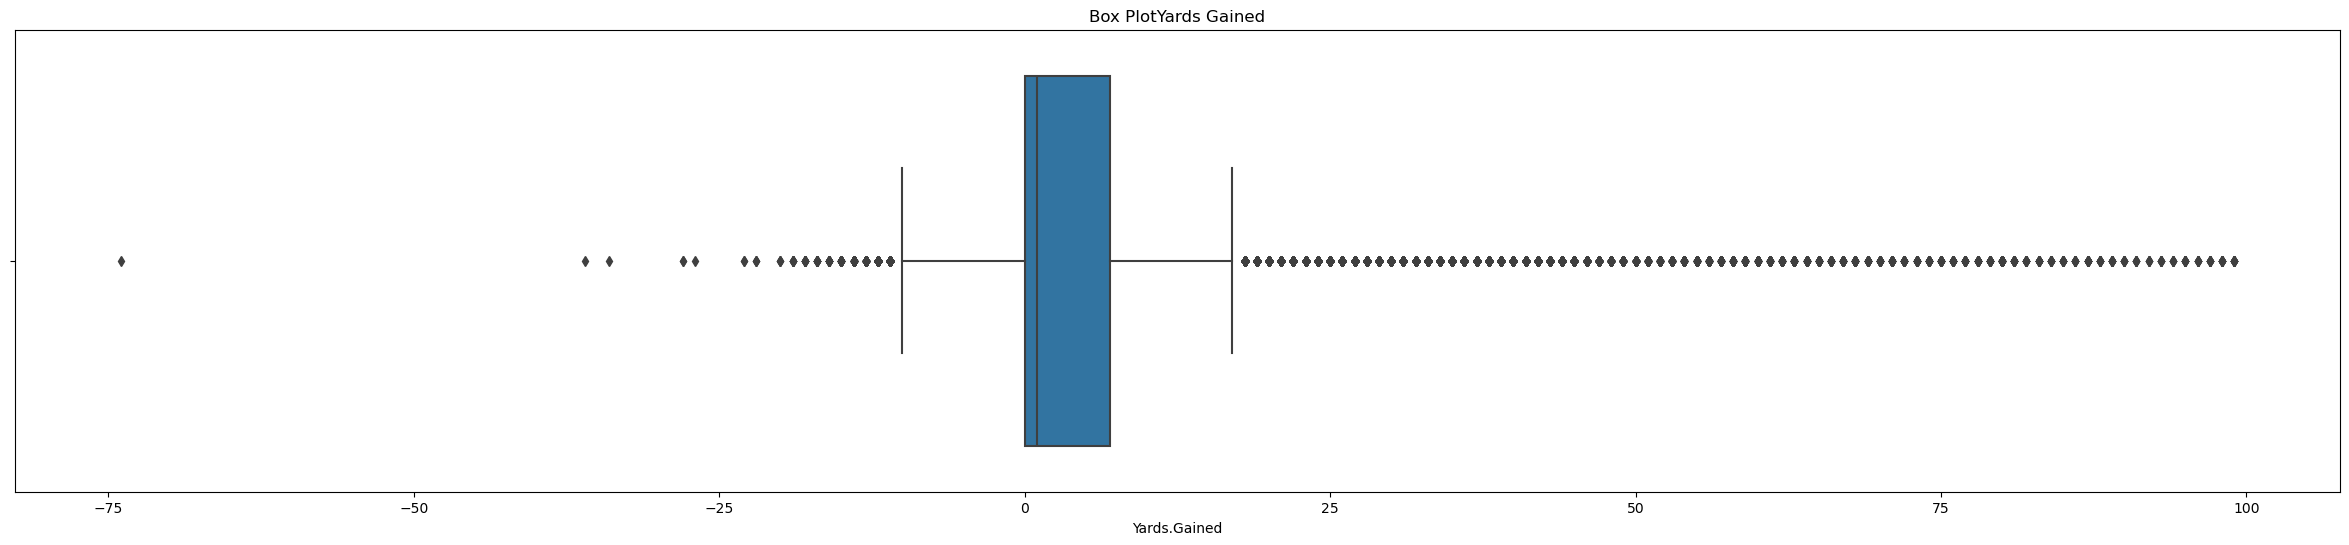

In [21]:
#Box Plot with outliers
plt.figure(figsize=(30,6))
sns.boxplot(x=data2['Yards.Gained'])
plt.title('Box PlotYards Gained')
plt.show()           

In [22]:
#Outliers
outliers=data2[['yrdln','yrdline100','ydstogo','ydsnet','Yards.Gained','AirYards','YardsAfterCatch','ScoreDiff']]
outliers.describe(percentiles=[.25,.50,.75,.99])

yrdln     yrdline100        ydstogo         ydsnet  \
count  362447.000000  362447.000000  362447.000000  362447.000000   
mean       28.356863      48.519828       7.305236      25.907895   
std        13.051101      25.230279       4.863445      24.859579   
min         0.000000       0.000000       0.000000     -87.000000   
25%        20.000000      30.000000       3.000000       5.000000   
50%        30.000000      49.000000       9.000000      19.000000   
75%        39.000000      70.000000      10.000000      43.000000   
99%        50.000000      94.000000      20.000000      85.000000   
max        50.000000      99.000000      50.000000      99.000000   

        Yards.Gained       AirYards  YardsAfterCatch      ScoreDiff  
count  362447.000000  362447.000000    362447.000000  362447.000000  
mean        5.034595       3.271648         1.253747      -1.118994  
std         9.144627       7.511632         4.199049      10.463108  
min       -74.000000     -70.000000       -81.000000     -59.000000  
25%         0.000000       0.000000         0.000000      -7.000000  
50%         1.000000       0.000000         0.000000       0.000000  
75%         7.000000       4.000000         0.000000       4.000000  
99%        41.000000      36.000000        19.000000      27.000000  
max        99.000000      84.000000        90.000000      59.000000

In [23]:
#Removing Outliers
#Capping at a reasonable threshold as outliers are valid but too extreme
data2['Yards.Gained'] = data2['Yards.Gained'].clip(lower=-20, upper=80)
data2['yrdln'] = data2['yrdln'].clip(lower=20, upper=35)
data2['yrdline100'] = data2['yrdline100'].clip(lower=20, upper=80)
data2['ydstogo'] = data2['ydstogo'].clip(lower=20, upper=35)
data2['ydsnet'] = data2['ydsnet'].clip(lower=-20, upper=80)
data2['AirYards'] = data2['AirYards'].clip(lower=-20, upper=80)
data2['YardsAfterCatch'] = data2['YardsAfterCatch'].clip(lower=-20, upper=80)
data2['ScoreDiff'] = data2['ScoreDiff'].clip(lower=-20, upper=35)

In [24]:
#Checking of the Data
data2.head(5)

Drive  qtr  down  TimeUnder  TimeSecs  PlayTimeDiff  yrdln  yrdline100  \
0      1    1   0.0         15    3600.0           0.0   30.0        30.0   
1      1    1   1.0         15    3593.0           7.0   35.0        58.0   
2      1    1   2.0         15    3556.0          37.0   35.0        53.0   
3      1    1   3.0         14    3515.0          41.0   35.0        56.0   
4      1    1   4.0         14    3507.0           8.0   35.0        56.0   

   ydstogo  ydsnet  ...    airEPA    yacEPA  Home_WP_pre  Away_WP_pre  \
0       20       0  ...  0.000000  0.000000     0.485675     0.514325   
1       20       5  ... -1.068169  1.146076     0.546433     0.453567   
2       20       2  ...  0.000000  0.000000     0.551088     0.448912   
3       20       2  ...  3.318841 -5.031425     0.510793     0.489207   
4       20       2  ...  0.000000  0.000000     0.461217     0.538783   

   Home_WP_post  Away_WP_post    airWPA    yacWPA  Season  Field_position  
0      0.546433      0.453567  0.000000  0.000000    2009            70.0  
1      0.551088      0.448912 -0.032244  0.036899    2009            58.0  
2      0.510793      0.489207  0.000000  0.000000    2009            53.0  
3      0.461217      0.538783  0.106663 -0.156239    2009            56.0  
4      0.558929      0.441071  0.000000  0.000000    2009            56.0  

[5 rows x 52 columns]

In [25]:
#Droping More unnecessay columns
data2=data2.drop(['Home_WP_pre','Away_WP_pre','Home_WP_post','Away_WP_post','airWPA','yacWPA'],axis=1)

In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Drive                362447 non-null  int64  
 1   qtr                  362447 non-null  int64  
 2   down                 362447 non-null  float64
 3   TimeUnder            362447 non-null  int64  
 4   TimeSecs             362447 non-null  float64
 5   PlayTimeDiff         362447 non-null  float64
 6   yrdln                362447 non-null  float64
 7   yrdline100           362447 non-null  float64
 8   ydstogo              362447 non-null  int64  
 9   ydsnet               362447 non-null  int64  
 10  GoalToGo             362447 non-null  float64
 11  FirstDown            362447 non-null  float64
 12  PlayAttempted        362447 non-null  int64  
 13  Yards.Gained         362447 non-null  int64  
 14  sp                   362447 non-null  int64  
 15  Touchdown        

In [27]:
#Droping columns more not needed
data2= data2.drop(['Fumble','Accepted.Penalty','Challenge.Replay','Opp_Field_Goal_Prob','Opp_Safety_Prob',
                   'Opp_Touchdown_Prob','Season','AbsScoreDiff'],axis=1)

In [28]:
data2.head(5)

Drive  qtr  down  TimeUnder  TimeSecs  PlayTimeDiff  yrdln  yrdline100  \
0      1    1   0.0         15    3600.0           0.0   30.0        30.0   
1      1    1   1.0         15    3593.0           7.0   35.0        58.0   
2      1    1   2.0         15    3556.0          37.0   35.0        53.0   
3      1    1   3.0         14    3515.0          41.0   35.0        56.0   
4      1    1   4.0         14    3507.0           8.0   35.0        56.0   

   ydstogo  ydsnet  ...  ScoreDiff  No_Score_Prob  Field_Goal_Prob  \
0       20       0  ...        0.0       0.001506         0.213700   
1       20       5  ...        0.0       0.000969         0.293700   
2       20       2  ...        0.0       0.001057         0.304805   
3       20       2  ...        0.0       0.001434         0.289336   
4       20       2  ...        0.0       0.001861         0.244603   

   Safety_Prob  Touchdown_Prob    ExpPts       EPA    airEPA    yacEPA  \
0     0.003592        0.313676  0.323526  2.014474  0.000000  0.000000   
1     0.003638        0.423011  2.338000  0.077907 -1.068169  1.146076   
2     0.003826        0.421478  2.415907 -1.402760  0.000000  0.000000   
3     0.004776        0.318621  1.013147 -1.712583  3.318841 -5.031425   
4     0.006404        0.208111 -0.699436  2.097796  0.000000  0.000000   

   Field_position  
0            70.0  
1            58.0  
2            53.0  
3            56.0  
4            56.0  

[5 rows x 38 columns]

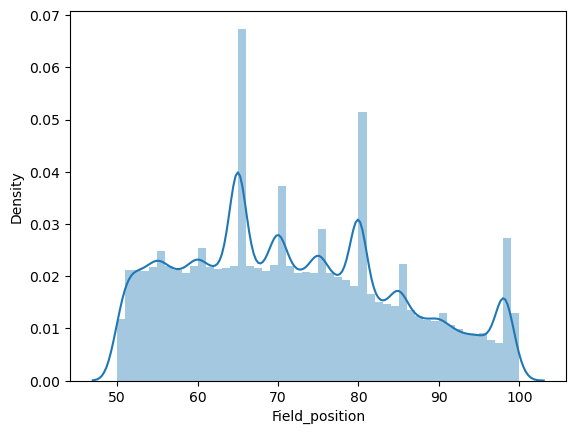

In [29]:
#Field_position
sns.distplot(data2['Field_position'],bins=50)
plt.show()

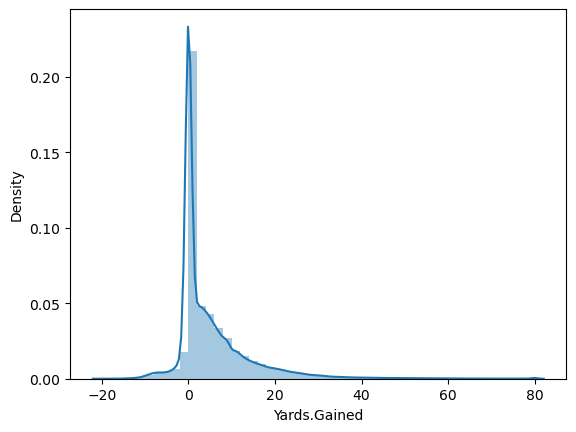

In [64]:
#Yards.Gained
sns.distplot(data2['Yards.Gained'],bins=50)
plt.show()

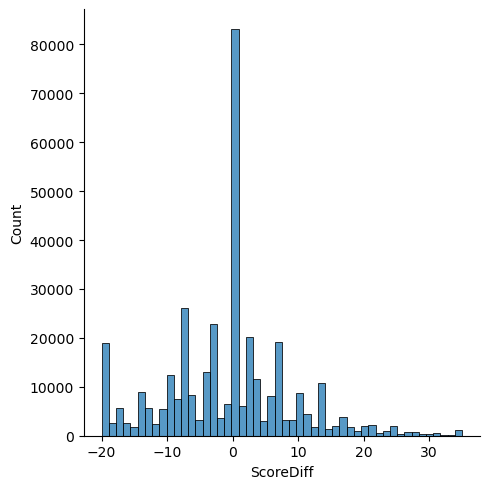

In [67]:
#ScoreDiff
sns.displot(data2['ScoreDiff'], bins=50)
plt.show()

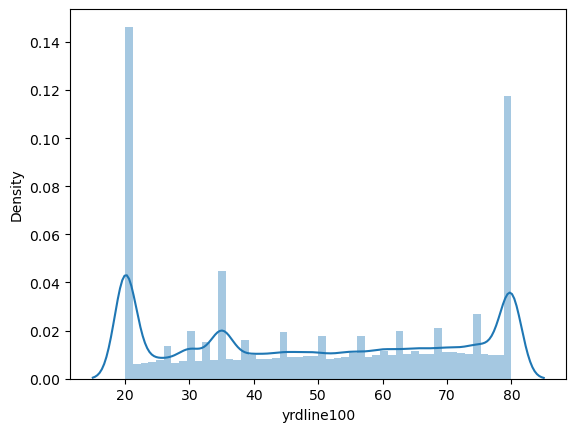

In [68]:
#yrdline100
sns.distplot(data2['yrdline100'],bins=50)
plt.show()

<Figure size 1000x800 with 0 Axes>

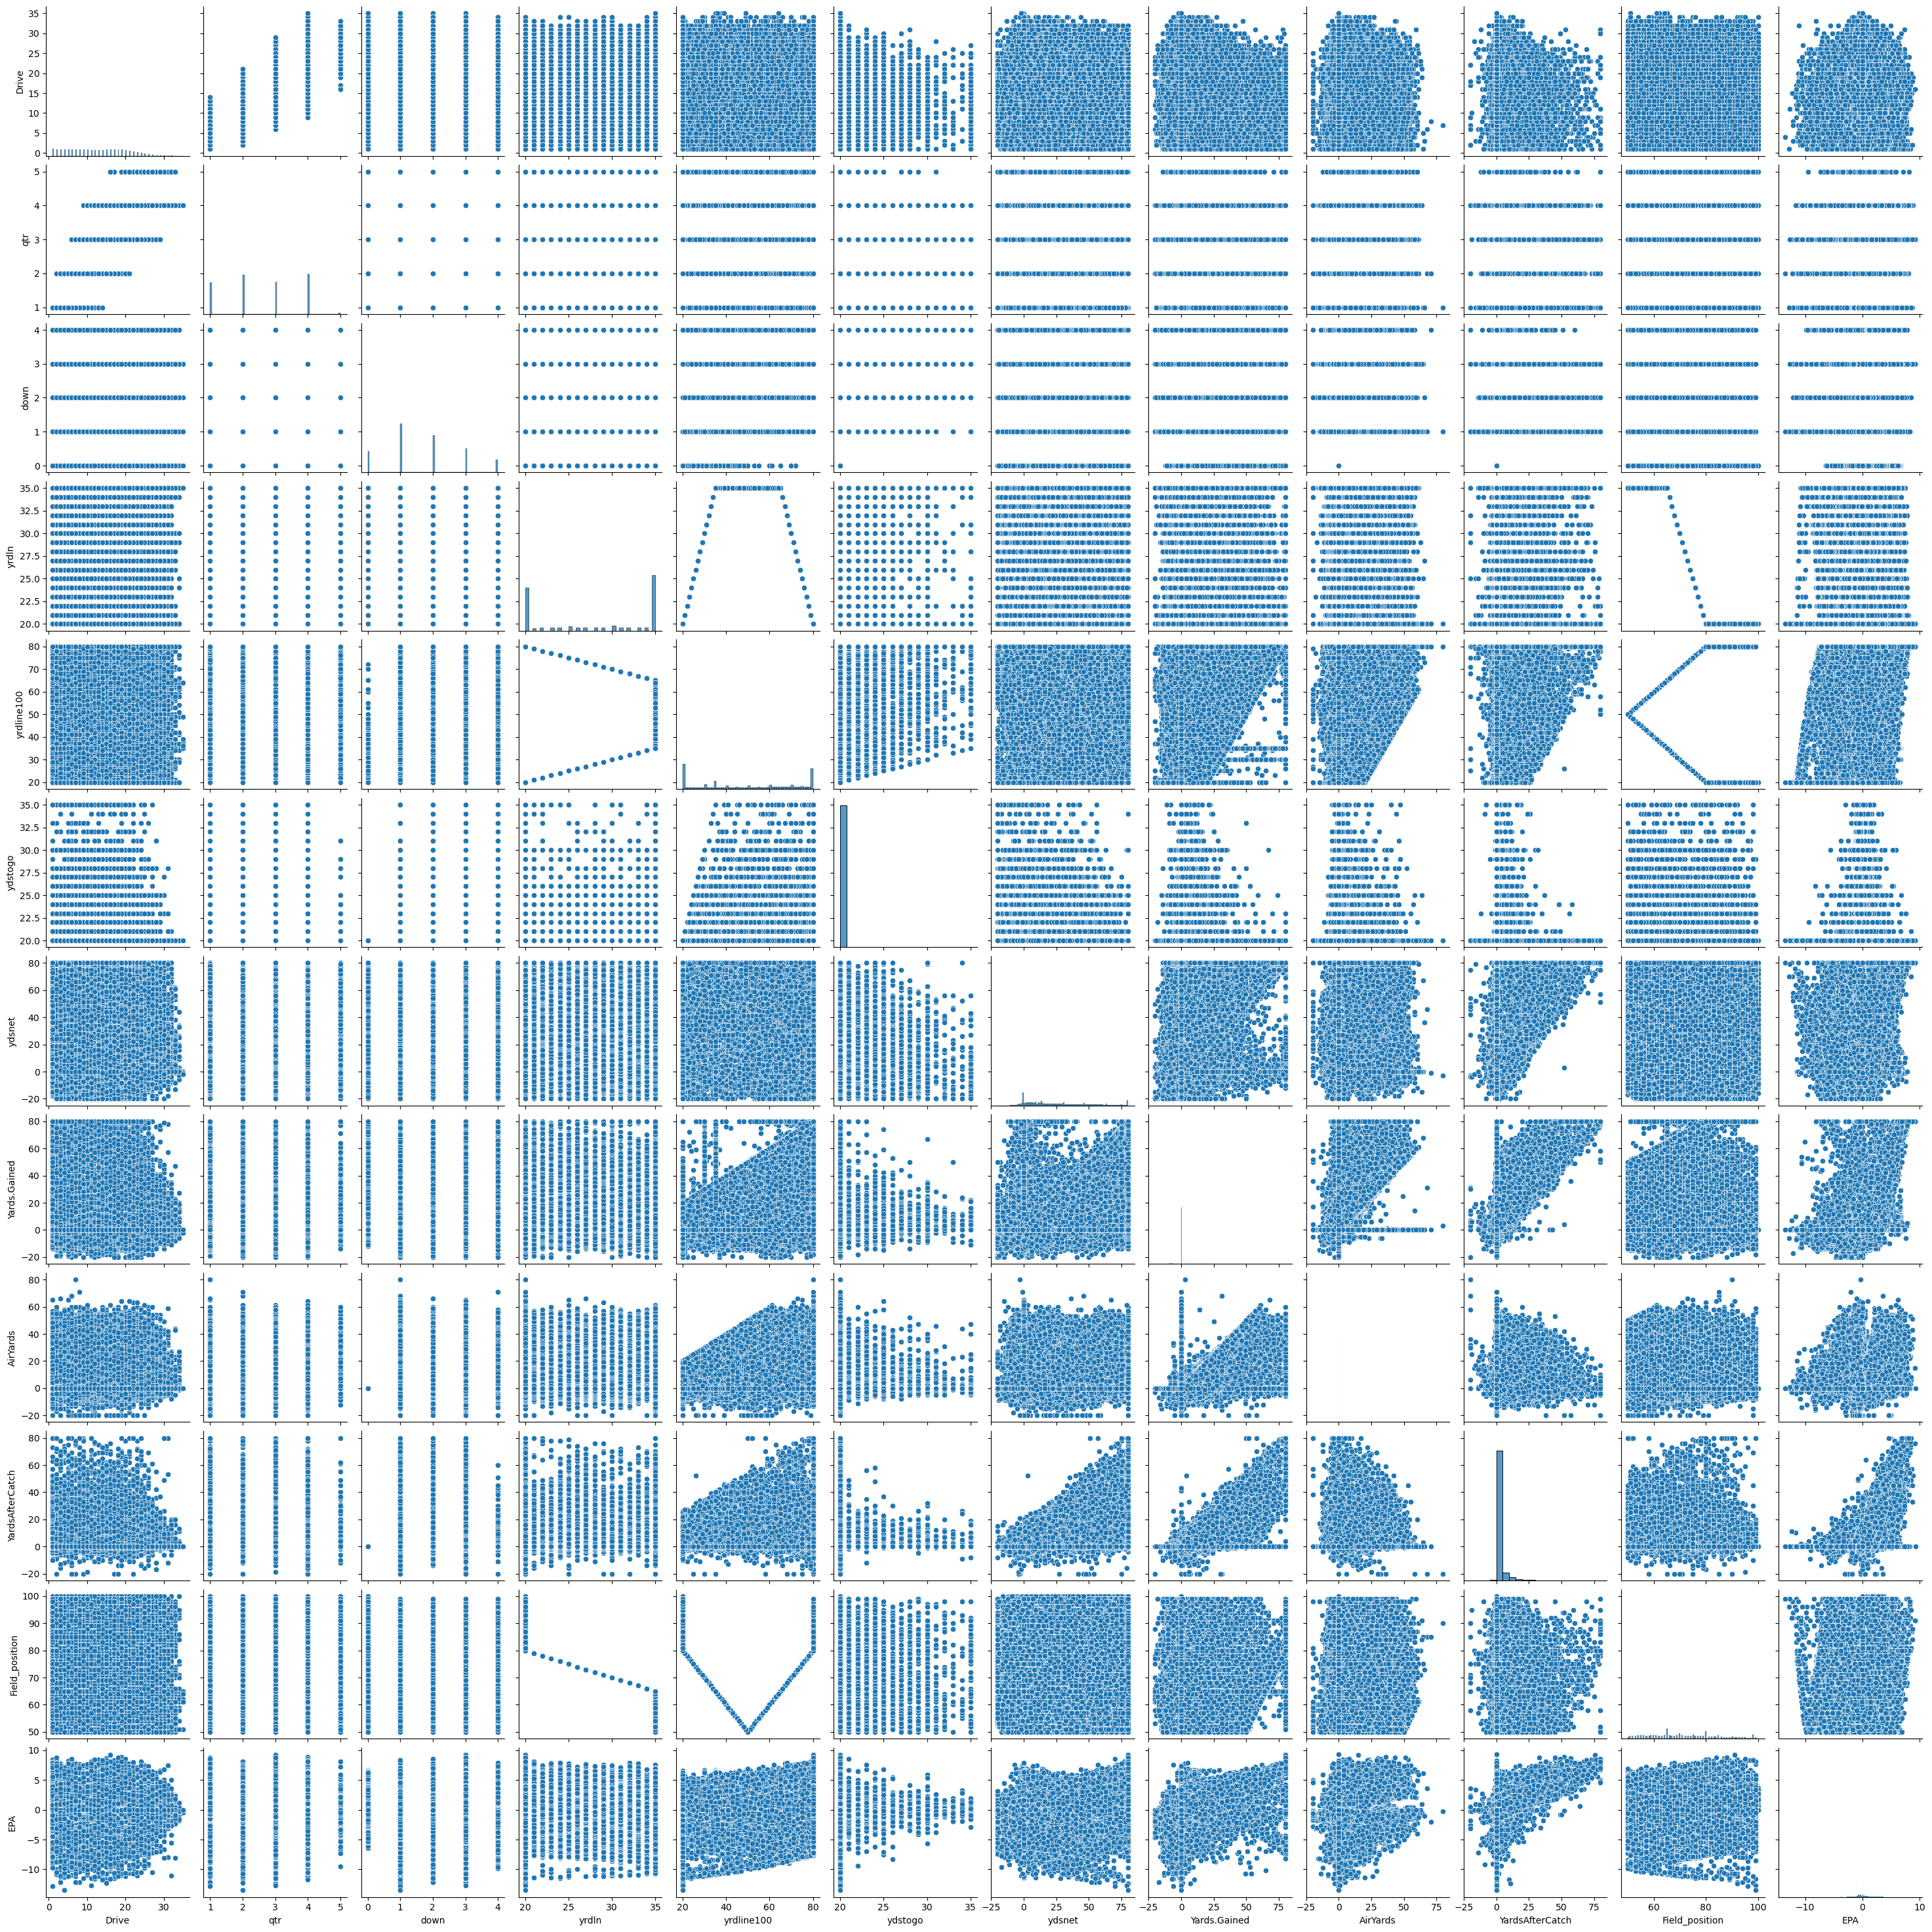

In [31]:
#Pairwise Scatter Plot
plt.figure(figsize=(10,8))
columns_to_plot = ['Drive','qtr','down','yrdln','yrdline100','ydstogo','ydsnet','Yards.Gained','AirYards','YardsAfterCatch','Field_position','EPA']
data2_subset = data2[columns_to_plot]
sns.pairplot(data2_subset)
plt.show()

In [32]:
#Correlation Matrix
cor=data2_subset.corr()
round(cor,3)

Drive    qtr   down  yrdln  yrdline100  ydstogo  ydsnet  \
Drive            1.000  0.917 -0.043  0.008      -0.038    0.003  -0.038   
qtr              0.917  1.000 -0.014  0.004      -0.052    0.006   0.012   
down            -0.043 -0.014  1.000 -0.007       0.198    0.073   0.021   
yrdln            0.008  0.004 -0.007  1.000       0.024   -0.002  -0.142   
yrdline100      -0.038 -0.052  0.198  0.024       1.000    0.048  -0.573   
ydstogo          0.003  0.006  0.073 -0.002       0.048    1.000  -0.045   
ydsnet          -0.038  0.012  0.021 -0.142      -0.573   -0.045   1.000   
Yards.Gained    -0.034 -0.027 -0.025  0.091       0.100    0.008   0.119   
AirYards         0.019  0.018  0.090  0.047       0.102    0.004   0.085   
YardsAfterCatch -0.015 -0.011  0.047  0.027       0.110    0.013   0.150   
Field_position  -0.008 -0.001 -0.049 -0.924      -0.125    0.002   0.188   
EPA             -0.006 -0.005 -0.026 -0.038       0.003   -0.007   0.215   

                 Yards.Gained  AirYards  YardsAfterCatch  Field_position  \
Drive                  -0.034     0.019           -0.015          -0.008   
qtr                    -0.027     0.018           -0.011          -0.001   
down                   -0.025     0.090            0.047          -0.049   
yrdln                   0.091     0.047            0.027          -0.924   
yrdline100              0.100     0.102            0.110          -0.125   
ydstogo                 0.008     0.004            0.013           0.002   
ydsnet                  0.119     0.085            0.150           0.188   
Yards.Gained            1.000     0.243            0.493          -0.095   
AirYards                0.243     1.000            0.061          -0.079   
YardsAfterCatch         0.493     0.061            1.000          -0.051   
Field_position         -0.095    -0.079           -0.051           1.000   
EPA                     0.535     0.099            0.359           0.039   

                   EPA  
Drive           -0.006  
qtr             -0.005  
down            -0.026  
yrdln           -0.038  
yrdline100       0.003  
ydstogo         -0.007  
ydsnet           0.215  
Yards.Gained     0.535  
AirYards         0.099  
YardsAfterCatch  0.359  
Field_position   0.039  
EPA              1.000

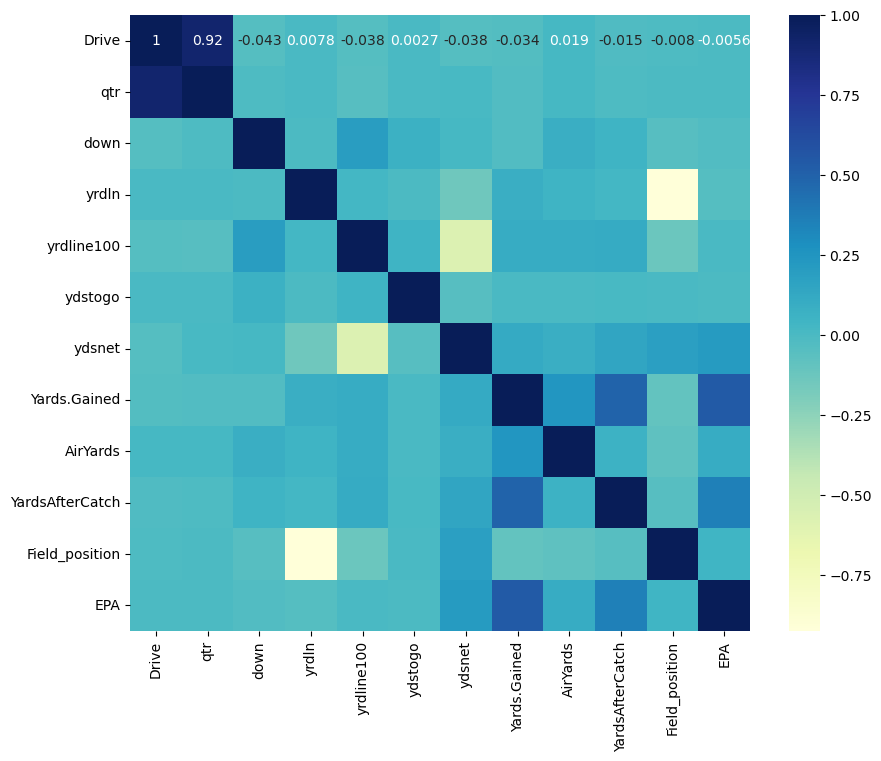

In [33]:
#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cor,cmap='YlGnBu',annot=True)
plt.show()

In [34]:
# Split the datafram into train and test sets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_train, df_test  = train_test_split(data2,train_size=0.7,test_size=0.3,random_state= 100)

In [35]:
# Import the StandardScaler()

from sklearn.preprocessing import StandardScaler

# Created a scaling object
scaler=StandardScaler()
# Created a list of the variables that needed to scale. Scale these variables using 'fit_transform'
num_vars = ['Drive','qtr','down','yrdln','yrdline100','ydstogo','ydsnet','Yards.Gained','AirYards','YardsAfterCatch','Field_position','EPA']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
#Visualising the data
df_train.head(5)

Drive       qtr      down  TimeUnder  TimeSecs  PlayTimeDiff  \
270494 -0.048131 -0.511627  0.256592          2    1871.0           7.0   
233415  0.649402  1.258860  0.256592          8     445.0          39.0   
332194 -1.164184 -1.396870 -0.598182          3    2823.0          30.0   
162675 -0.187638 -0.511627 -0.598182         10    2347.0          40.0   
270957 -1.164184 -1.396870  0.256592         10    3244.0           7.0   

           yrdln  yrdline100   ydstogo    ydsnet  ...  ScoreDiff  \
270494  1.034551   -0.628666 -0.076652  0.823986  ...        6.0   
233415 -1.257926    1.407264 -0.076652  0.538883  ...       10.0   
332194 -0.799430    1.268451 -0.076652 -0.438615  ...       -3.0   
162675  0.423224    0.898282 -0.076652 -0.153512  ...        2.0   
270957  1.034551   -0.119684 -0.076652  0.294508  ...       -7.0   

        No_Score_Prob  Field_Goal_Prob  Safety_Prob  Touchdown_Prob    ExpPts  \
270494       0.412553         0.316941     0.000710        0.219305  2.251128   
233415       0.288892         0.114237     0.002514        0.166693 -0.758104   
332194       0.031588         0.223374     0.003414        0.334249  0.828806   
162675       0.157456         0.221121     0.002928        0.333013  1.467891   
270957       0.003170         0.341405     0.003719        0.412481  2.621424   

             EPA    airEPA    yacEPA  Field_position  
270494  0.356022  0.000000  0.000000       -0.585518  
233415  2.120358  0.650074  2.196706        1.330370  
332194 -0.340894  0.000000  0.000000        0.410744  
162675  0.600071  0.819945  0.000000       -0.202341  
270957 -0.691179 -1.288664  0.387126       -1.428509  

[5 rows x 38 columns]

In [37]:
# Split the train dataset into X and y
y_train = df_train.pop('EPA')
X_train = df_train

In [38]:
#Linear regression line fit
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [41]:
# Importing RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# RFE with 15 features

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)
# Fit with 15 features

# Printing the boolean results
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Drive', False, 11),
 ('qtr', False, 12),
 ('down', False, 4),
 ('TimeUnder', False, 15),
 ('TimeSecs', False, 22),
 ('PlayTimeDiff', False, 21),
 ('yrdln', False, 8),
 ('yrdline100', False, 9),
 ('ydstogo', False, 20),
 ('ydsnet', True, 1),
 ('GoalToGo', False, 6),
 ('FirstDown', True, 1),
 ('PlayAttempted', False, 23),
 ('Yards.Gained', True, 1),
 ('sp', True, 1),
 ('Touchdown', True, 1),
 ('Safety', False, 16),
 ('Onsidekick', True, 1),
 ('PassAttempt', True, 1),
 ('AirYards', False, 5),
 ('YardsAfterCatch', False, 2),
 ('QBHit', False, 10),
 ('InterceptionThrown', True, 1),
 ('Reception', True, 1),
 ('Sack', True, 1),
 ('Penalty.Yards', False, 14),
 ('PosTeamScore', False, 18),
 ('DefTeamScore', False, 17),
 ('ScoreDiff', False, 19),
 ('No_Score_Prob', False, 13),
 ('Field_Goal_Prob', False, 3),
 ('Safety_Prob', True, 1),
 ('Touchdown_Prob', True, 1),
 ('ExpPts', True, 1),
 ('airEPA', True, 1),
 ('yacEPA', True, 1),
 ('Field_position', False, 7)]

In [42]:
# Importing statsmodels to check summary
import statsmodels.api as sm  
# Subsetting the features selected by rfe1
X_train.columns[~rfe.support_]
# Subsetting training data for 15 selected columns
col = X_train.columns[rfe.support_]
col
# Add a constant to the model
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
# Fitting the model with 15 variables
lm_1 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPA   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 3.364e+04
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:16:03   Log-Likelihood:            -2.2111e+05
No. Observations:              253712   AIC:                         4.423e+05
Df Residuals:                  253696   BIC:                         4.424e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0337      0

In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

              features   VIF
0                const  7.60
12      Touchdown_Prob  7.09
13              ExpPts  6.26
15              yacEPA  4.09
9            Reception  3.59
7          PassAttempt  2.96
11         Safety_Prob  2.75
14              airEPA  2.43
4                   sp  2.37
5            Touchdown  2.16
1               ydsnet  1.96
3         Yards.Gained  1.67
8   InterceptionThrown  1.53
2            FirstDown  1.41
10                Sack  1.09
6           Onsidekick  1.00


In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif.head()

features   VIF
0            const  7.60
12  Touchdown_Prob  7.09
13          ExpPts  6.26
15          yacEPA  4.09
9        Reception  3.59

In [47]:
#Creating second RFE 
# RFE with 10 features
rfe2 = RFE(estimator=lm, n_features_to_select=10)

# Fit with 10 features
rfe2 = rfe2.fit(X_train,y_train)
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('Drive', False, 16),
 ('qtr', False, 17),
 ('down', False, 9),
 ('TimeUnder', False, 20),
 ('TimeSecs', False, 27),
 ('PlayTimeDiff', False, 26),
 ('yrdln', False, 13),
 ('yrdline100', False, 14),
 ('ydstogo', False, 25),
 ('ydsnet', False, 5),
 ('GoalToGo', False, 11),
 ('FirstDown', True, 1),
 ('PlayAttempted', False, 28),
 ('Yards.Gained', False, 4),
 ('sp', True, 1),
 ('Touchdown', True, 1),
 ('Safety', False, 21),
 ('Onsidekick', True, 1),
 ('PassAttempt', False, 3),
 ('AirYards', False, 10),
 ('YardsAfterCatch', False, 7),
 ('QBHit', False, 15),
 ('InterceptionThrown', True, 1),
 ('Reception', False, 2),
 ('Sack', True, 1),
 ('Penalty.Yards', False, 19),
 ('PosTeamScore', False, 23),
 ('DefTeamScore', False, 22),
 ('ScoreDiff', False, 24),
 ('No_Score_Prob', False, 18),
 ('Field_Goal_Prob', False, 8),
 ('Safety_Prob', True, 1),
 ('Touchdown_Prob', True, 1),
 ('ExpPts', False, 6),
 ('airEPA', True, 1),
 ('yacEPA', True, 1),
 ('Field_position', False, 12)]

In [48]:
# Subset the features selected by rfe2
X_train.columns[~rfe2.support_]
# Subsetting training data for 10 selected columns
col = X_train.columns[rfe2.support_]
col

Index(['FirstDown', 'sp', 'Touchdown', 'Onsidekick', 'InterceptionThrown',
       'Sack', 'Safety_Prob', 'Touchdown_Prob', 'airEPA', 'yacEPA'],
      dtype='object')

In [49]:
# Subset the features selected by rfe2
X_train.columns[~rfe2.support_]
# Subsetting training data for 10 selected columns
col = X_train.columns[rfe2.support_]
col
# Add a constant to the model
import statsmodels.api as sm 
X_train_rfe2 = X_train[col]
X_train_rfe2 = sm.add_constant(X_train_rfe2)
# Fitting the model with 10 variables
lm_2 = sm.OLS(y_train,X_train_rfe2).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPA   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                 4.513e+04
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:20:53   Log-Likelihood:            -2.3034e+05
No. Observations:              253712   AIC:                         4.607e+05
Df Residuals:                  253701   BIC:                         4.608e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0172      0

In [50]:
#The Adjusted R-Squared value has not been droped much(0.665 to 0.640). So its a good way to start with 10 features.

# Check for the VIF values of the feature variables. 
vif2 = pd.DataFrame()
vif2['features'] = X_train_rfe2.columns
vif2['VIF'] = [variance_inflation_factor(X_train_rfe2.values,i) for i in range(0,X_train_rfe2.shape[1])]
vif2['VIF'] = round(vif2['VIF'],2)
vif2 = vif.sort_values(by="VIF",ascending=False)
print(vif2)

              features   VIF
0                const  7.60
12      Touchdown_Prob  7.09
13              ExpPts  6.26
15              yacEPA  4.09
9            Reception  3.59
7          PassAttempt  2.96
11         Safety_Prob  2.75
14              airEPA  2.43
4                   sp  2.37
5            Touchdown  2.16
1               ydsnet  1.96
3         Yards.Gained  1.67
8   InterceptionThrown  1.53
2            FirstDown  1.41
10                Sack  1.09
6           Onsidekick  1.00


In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif2.head()

features   VIF
0            const  7.60
12  Touchdown_Prob  7.09
13          ExpPts  6.26
15          yacEPA  4.09
9        Reception  3.59

In [52]:
#Build multiple models with needed features
rfe3 = RFE(estimator=lm, n_features_to_select=6)

# Fit with 6 features
rfe3 = rfe3.fit(X_train,y_train)
list(zip(X_train.columns,rfe3.support_,rfe3.ranking_))

[('Drive', False, 20),
 ('qtr', False, 21),
 ('down', False, 13),
 ('TimeUnder', False, 24),
 ('TimeSecs', False, 31),
 ('PlayTimeDiff', False, 30),
 ('yrdln', False, 17),
 ('yrdline100', False, 18),
 ('ydstogo', False, 29),
 ('ydsnet', False, 9),
 ('GoalToGo', False, 15),
 ('FirstDown', False, 4),
 ('PlayAttempted', False, 32),
 ('Yards.Gained', False, 8),
 ('sp', False, 5),
 ('Touchdown', True, 1),
 ('Safety', False, 25),
 ('Onsidekick', True, 1),
 ('PassAttempt', False, 7),
 ('AirYards', False, 14),
 ('YardsAfterCatch', False, 11),
 ('QBHit', False, 19),
 ('InterceptionThrown', False, 3),
 ('Reception', False, 6),
 ('Sack', True, 1),
 ('Penalty.Yards', False, 23),
 ('PosTeamScore', False, 27),
 ('DefTeamScore', False, 26),
 ('ScoreDiff', False, 28),
 ('No_Score_Prob', False, 22),
 ('Field_Goal_Prob', False, 12),
 ('Safety_Prob', True, 1),
 ('Touchdown_Prob', False, 2),
 ('ExpPts', False, 10),
 ('airEPA', True, 1),
 ('yacEPA', True, 1),
 ('Field_position', False, 16)]

In [53]:
# Subsetting the features selected by rfe2
X_train.columns[~rfe3.support_]
# Subsetting training data for 06 selected columns
col = X_train.columns[rfe3.support_]
col

Index(['Touchdown', 'Onsidekick', 'Sack', 'Safety_Prob', 'airEPA', 'yacEPA'], dtype='object')

In [54]:
# Adding a constant to the model
import statsmodels.api as sm 
X_train_rfe3 = X_train[col]
X_train_rfe3 = sm.add_constant(X_train_rfe3)
# Fitting the model with 06 variables
lm_3 = sm.OLS(y_train,X_train_rfe3).fit() 
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPA   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 7.131e+04
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:27:09   Log-Likelihood:            -2.3464e+05
No. Observations:              253712   AIC:                         4.693e+05
Df Residuals:                  253705   BIC:                         4.694e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0033      0.003     -1.331      

In [55]:
#Checking for VIF
vif3 = pd.DataFrame()
vif3['features'] = X_train_rfe3.columns
vif3['VIF'] = [variance_inflation_factor(X_train_rfe3.values,i) for i in range(0,X_train_rfe3.shape[1])]
vif3['VIF'] = round(vif2['VIF'],2)
vif3 = vif.sort_values(by="VIF",ascending=False)
print(vif3)

              features   VIF
0                const  7.60
12      Touchdown_Prob  7.09
13              ExpPts  6.26
15              yacEPA  4.09
9            Reception  3.59
7          PassAttempt  2.96
11         Safety_Prob  2.75
14              airEPA  2.43
4                   sp  2.37
5            Touchdown  2.16
1               ydsnet  1.96
3         Yards.Gained  1.67
8   InterceptionThrown  1.53
2            FirstDown  1.41
10                Sack  1.09
6           Onsidekick  1.00


In [56]:
#All the VIF values and p-values seem to be in a good range.
#Also the Adjusted R-squared value has dropped from 0.665 with 15 variables to just 0.628 using 6 variables. 


In [57]:
#Before we make predictions on the test set, let's first analyse the residuals.
y_train_price = lm_3.predict(X_train_rfe3)

Text(0.5, 0, 'Errors')

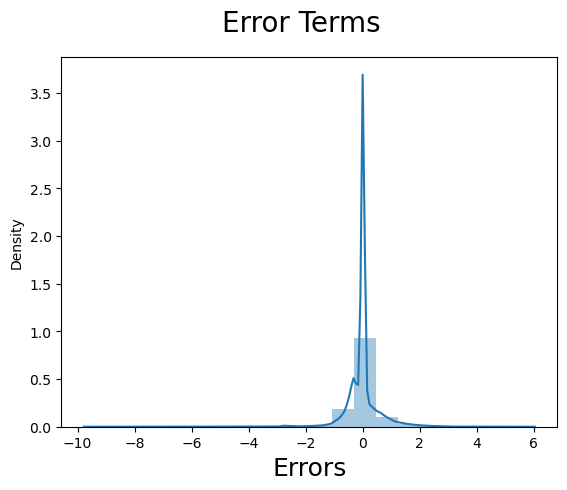

In [58]:
# Plot the histogram of the error terms
                
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

In [59]:
#Again for making predictions we need to Scale
num_vars = ['Drive','qtr','down','yrdln','yrdline100','ydstogo','ydsnet','Yards.Gained','AirYards','YardsAfterCatch','Field_position','EPA']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

Drive       qtr      down  TimeUnder  TimeSecs  PlayTimeDiff  \
48065  -1.303690 -1.396870 -1.452957          9    3219.0           0.0   
97509  -0.466651 -0.511627  0.256592          6    2138.0          36.0   
78634  -0.466651 -0.511627 -0.598182         15    2662.0           9.0   
174306 -1.582703 -1.396870 -1.452957         15    3600.0           0.0   
149139 -0.187638 -0.511627 -1.452957          1    1854.0          11.0   

           yrdln  yrdline100   ydstogo    ydsnet  ...  ScoreDiff  \
48065   0.270392   -0.906293 -0.076652 -1.049552  ...       -7.0   
97509  -0.646598    1.222180 -0.076652 -0.153512  ...        7.0   
78634  -1.257926    1.407264 -0.076652 -1.171739  ...      -14.0   
174306  1.034551   -0.674937 -0.076652 -1.049552  ...        0.0   
149139 -1.257926   -1.369005 -0.076652 -0.723719  ...        0.0   

        No_Score_Prob  Field_Goal_Prob  Safety_Prob  Touchdown_Prob    ExpPts  \
48065        0.006954         0.215094     0.003522        0.319125  0.437838   
97509        0.344174         0.141823     0.002463        0.221442  0.431608   
78634        0.062987         0.202793     0.003240        0.305893  0.480006   
174306       0.001506         0.213700     0.003592        0.313676  0.323526   
149139       0.000000         0.000000     0.000000        0.000000  0.000000   

             EPA    airEPA    yacEPA  Field_position  
48065   0.279241  0.000000  0.000000       -0.125705  
97509   1.137288  1.515931  0.020228        0.334108  
78634  -0.858442  0.000000  0.000000        0.717286  
174306 -0.014953  0.000000  0.000000       -0.508883  
149139 -0.014953  0.000000  0.000000        0.870557  

[5 rows x 38 columns]

In [60]:
# Spliting the 'df_test' set into X and y
y_test = df_test.pop('EPA')
X_test = df_test

In [61]:
#  Checking the list 'col2' which had the 10 variables RFE had selected
col = X_train.columns[rfe2.support_]
col

Index(['FirstDown', 'sp', 'Touchdown', 'Onsidekick', 'InterceptionThrown',
       'Sack', 'Safety_Prob', 'Touchdown_Prob', 'airEPA', 'yacEPA'],
      dtype='object')

In [62]:
#  Subsetting these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col]
print(X_test_rfe2)

        FirstDown  sp  Touchdown  Onsidekick  InterceptionThrown  Sack  \
48065         0.0   0          0           0                   0     0   
97509         1.0   0          0           0                   0     0   
78634         0.0   0          0           0                   0     1   
174306        0.0   0          0           0                   0     0   
149139        0.0   0          0           0                   0     0   
...           ...  ..        ...         ...                 ...   ...   
273468        0.0   0          0           0                   0     0   
226590        1.0   0          0           0                   0     0   
46024         0.0   0          0           0                   0     0   
190260        0.0   0          0           0                   0     0   
313849        0.0   0          0           0                   0     0   

        Safety_Prob  Touchdown_Prob    airEPA    yacEPA  
48065      0.003522        0.319125  0.000000  0.0000

In [64]:
# Checking the values once
X_test_rfe2.head()

FirstDown  sp  Touchdown  Onsidekick  InterceptionThrown  Sack  \
48065         0.0   0          0           0                   0     0   
97509         1.0   0          0           0                   0     0   
78634         0.0   0          0           0                   0     1   
174306        0.0   0          0           0                   0     0   
149139        0.0   0          0           0                   0     0   

        Safety_Prob  Touchdown_Prob    airEPA    yacEPA  
48065      0.003522        0.319125  0.000000  0.000000  
97509      0.002463        0.221442  1.515931  0.020228  
78634      0.003240        0.305893  0.000000  0.000000  
174306     0.003592        0.313676  0.000000  0.000000  
149139     0.000000        0.000000  0.000000  0.000000

In [65]:
# Adding a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)

In [66]:
# Making predictions
y_pred = lm_2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

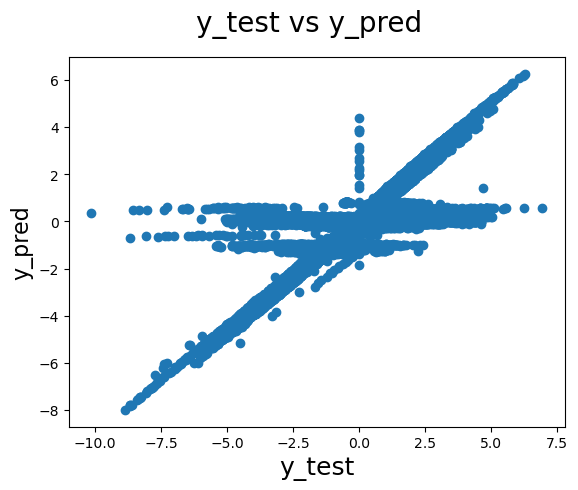

In [67]:
# Plotting y_test and y_pred to understand the spread 
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

In [68]:
#isplaying the values
y_pred.head()

48065    -0.095463
97509     1.195857
78634    -1.254116
174306   -0.093857
149139   -0.017184
dtype: float64

In [69]:
# r2_score for 6 variables

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test,y_pred))
r2_score(y_test, y_pred)

0.6350595212585743